<a href="https://colab.research.google.com/github/shashikumar1998/ML_Project/blob/main/ML_model_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
# Importing the required libraries
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

file_path = 'Downloads/transformed_ML_data.csv'
df = pd.read_csv(file_path)

In [ ]:
df

,Unnamed: 0,types,uid_string,id.orig_addr,id.orig_port,id.resp_haddr,id.resp_pport,resp_bytes_count,missed_bytes_count,history_string,orig_pkts_count,orig_ip_bytes_count,resp_pkts_count,Category
0,0,1.532101e+09,192.168.100.108,5353.0,224.0.0.251,5353.0,udp,S0,1.0,59.502659,22.311517,-0.018110,-0.015391,Non DDoS
1,1,1.532101e+09,192.168.100.108,54360.0,192.168.100.1,53.0,udp,SF,3.0,5.937520,1.354214,21.979345,40.296080,Non DDoS
2,2,1.532101e+09,192.168.100.108,53971.0,192.168.100.1,53.0,udp,SF,3.0,5.937520,1.354214,21.979345,63.098528,Non DDoS
3,3,1.532101e+09,192.168.100.108,57415.0,192.168.100.1,53.0,udp,SF,3.0,5.937520,1.354214,21.979345,51.493711,Non DDoS
4,4,1.532101e+09,192.168.100.108,34266.0,192.168.100.1,53.0,udp,SF,3.0,5.937520,1.354214,21.979345,51.493711,Non DDoS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11448418,11448419,1.532187e+09,140.186.106.113,3.0,192.168.100.108,13.0,icmp,OTH,29.0,-0.014162,0.158406,-0.018110,-0.015391,Non DDoS
11448419,11448420,1.532187e+09,2.203.14.58,3.0,192.168.100.108,13.0,icmp,OTH,29.0,-0.014162,0.158406,-0.018110,-0.015391,Non DDoS
11448420,11448421,1.532187e+09,212.144.235.74,3.0,192.168.100.108,1.0,icmp,OTH,29.0,-0.014162,0.342376,-0.018110,-0.015391,Non DDoS
11448421,11448422,1.532187e+09,193.136.134.150,3.0,192.168.100.108,1.0,icmp,OTH,29.0,5.937520,1.384876,-0.018110,-0.015391,Non DDoS


Sampling Code

Target class distribution
Category
Non DDoS          11408839
Malicious DDoS       39584
Name: count, dtype: int64
Target class distribution after Sampling
0    11408839
1    11408839
Name: count, dtype: int64
Target class(train) distribution after Sampling
0    9127071
1    9127071
Name: count, dtype: int64
Target class(test) distribution after Sampling
0    2281768
1    2281768
Name: count, dtype: int64


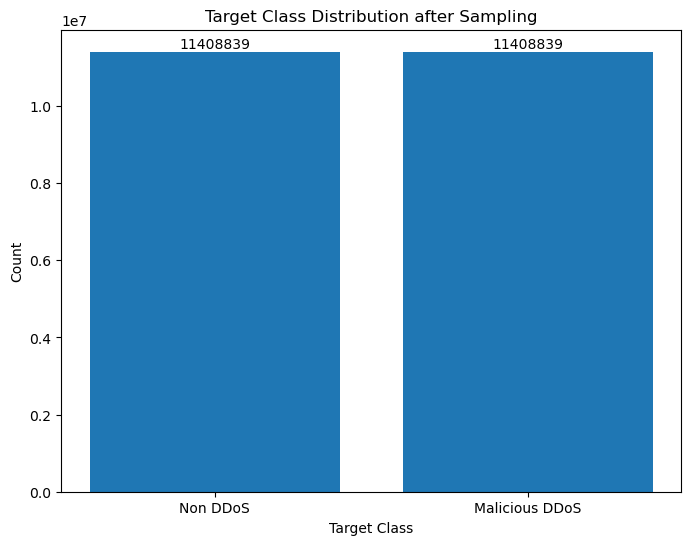

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler

# Assuming df is your original DataFrame
X = df.drop(['Category', 'uid_string', 'history_string', 'id.orig_port', 'id.resp_pport', 'resp_bytes_count'], axis=1)
y = df['Category']
print('Target class distribution')
print(y.value_counts())

# Assuming 'y' is your target variable
# Convert categorical target variable to numerical using LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Apply RandomOverSampler to the minority class
oversample = RandomOverSampler(sampling_strategy='minority')
# fit and apply the transform
X_over, y_over = oversample.fit_resample(X, y_encoded)
print('Target class distribution after Sampling')
print(pd.DataFrame(y_over).value_counts())

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, stratify=y_over, test_size=0.2, random_state=42)
print('Target class(train) distribution after Sampling')
print(pd.DataFrame(y_train).value_counts())
print('Target class(test) distribution after Sampling')
print(pd.DataFrame(y_test).value_counts())

# Convert the index of y_over to a list of strings
target_classes = y.value_counts().index.astype(str)

# Plot bar plot for target class distribution with count values on top
plt.figure(figsize=(8, 6))
bars = plt.bar(target_classes, pd.DataFrame(y_over).value_counts().values)
plt.title('Target Class Distribution after Sampling')
plt.xlabel('Target Class')
plt.ylabel('Count')

# Add count values on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 5, int(yval), ha='center', va='bottom')

plt.show()

L1 regularization

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import LabelEncoder
# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply L1 regularization
model = LogisticRegression(penalty='l1', solver='liblinear')
model.fit(X_train_scaled, y_train)

# Evaluate the model
accuracy = model.score(X_test_scaled, y_test)
print(f'Accuracy: {accuracy}')

C:\Users\016775421\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Accuracy: 0.9967674189488152


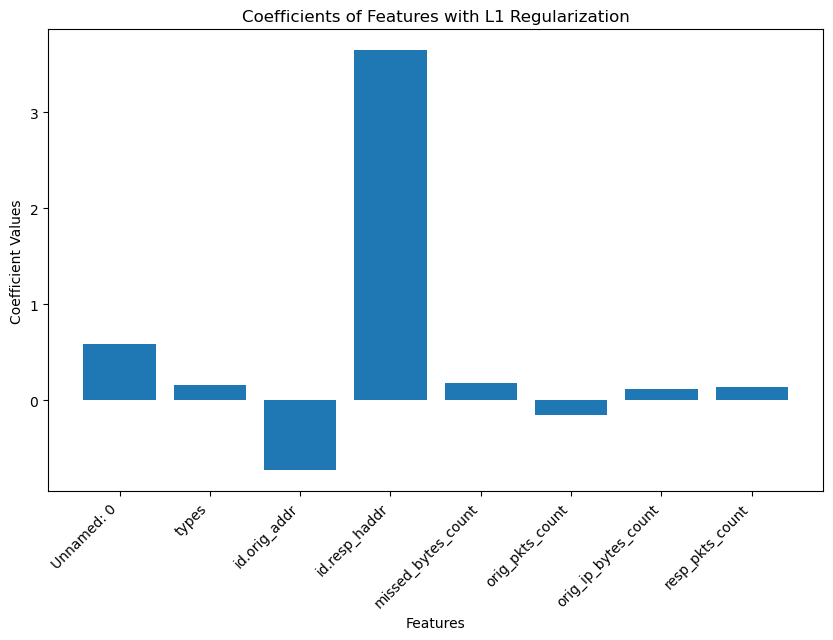

In [ ]:
import matplotlib.pyplot as plt

# Get the coefficients from the trained model
coefficients = model.coef_[0]

# Get the feature names
feature_names = X.columns

# Create a bar plot to visualize the coefficients
plt.figure(figsize=(10, 6))
plt.bar(feature_names, coefficients)
plt.title('Coefficients of Features with L1 Regularization')
plt.xlabel('Features')
plt.ylabel('Coefficient Values')
plt.xticks(rotation=45, ha='right')
plt.show()

Random Forest Algorithm Implementation

In [ ]:
from sklearn.ensemble import RandomForestClassifier

classifier_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

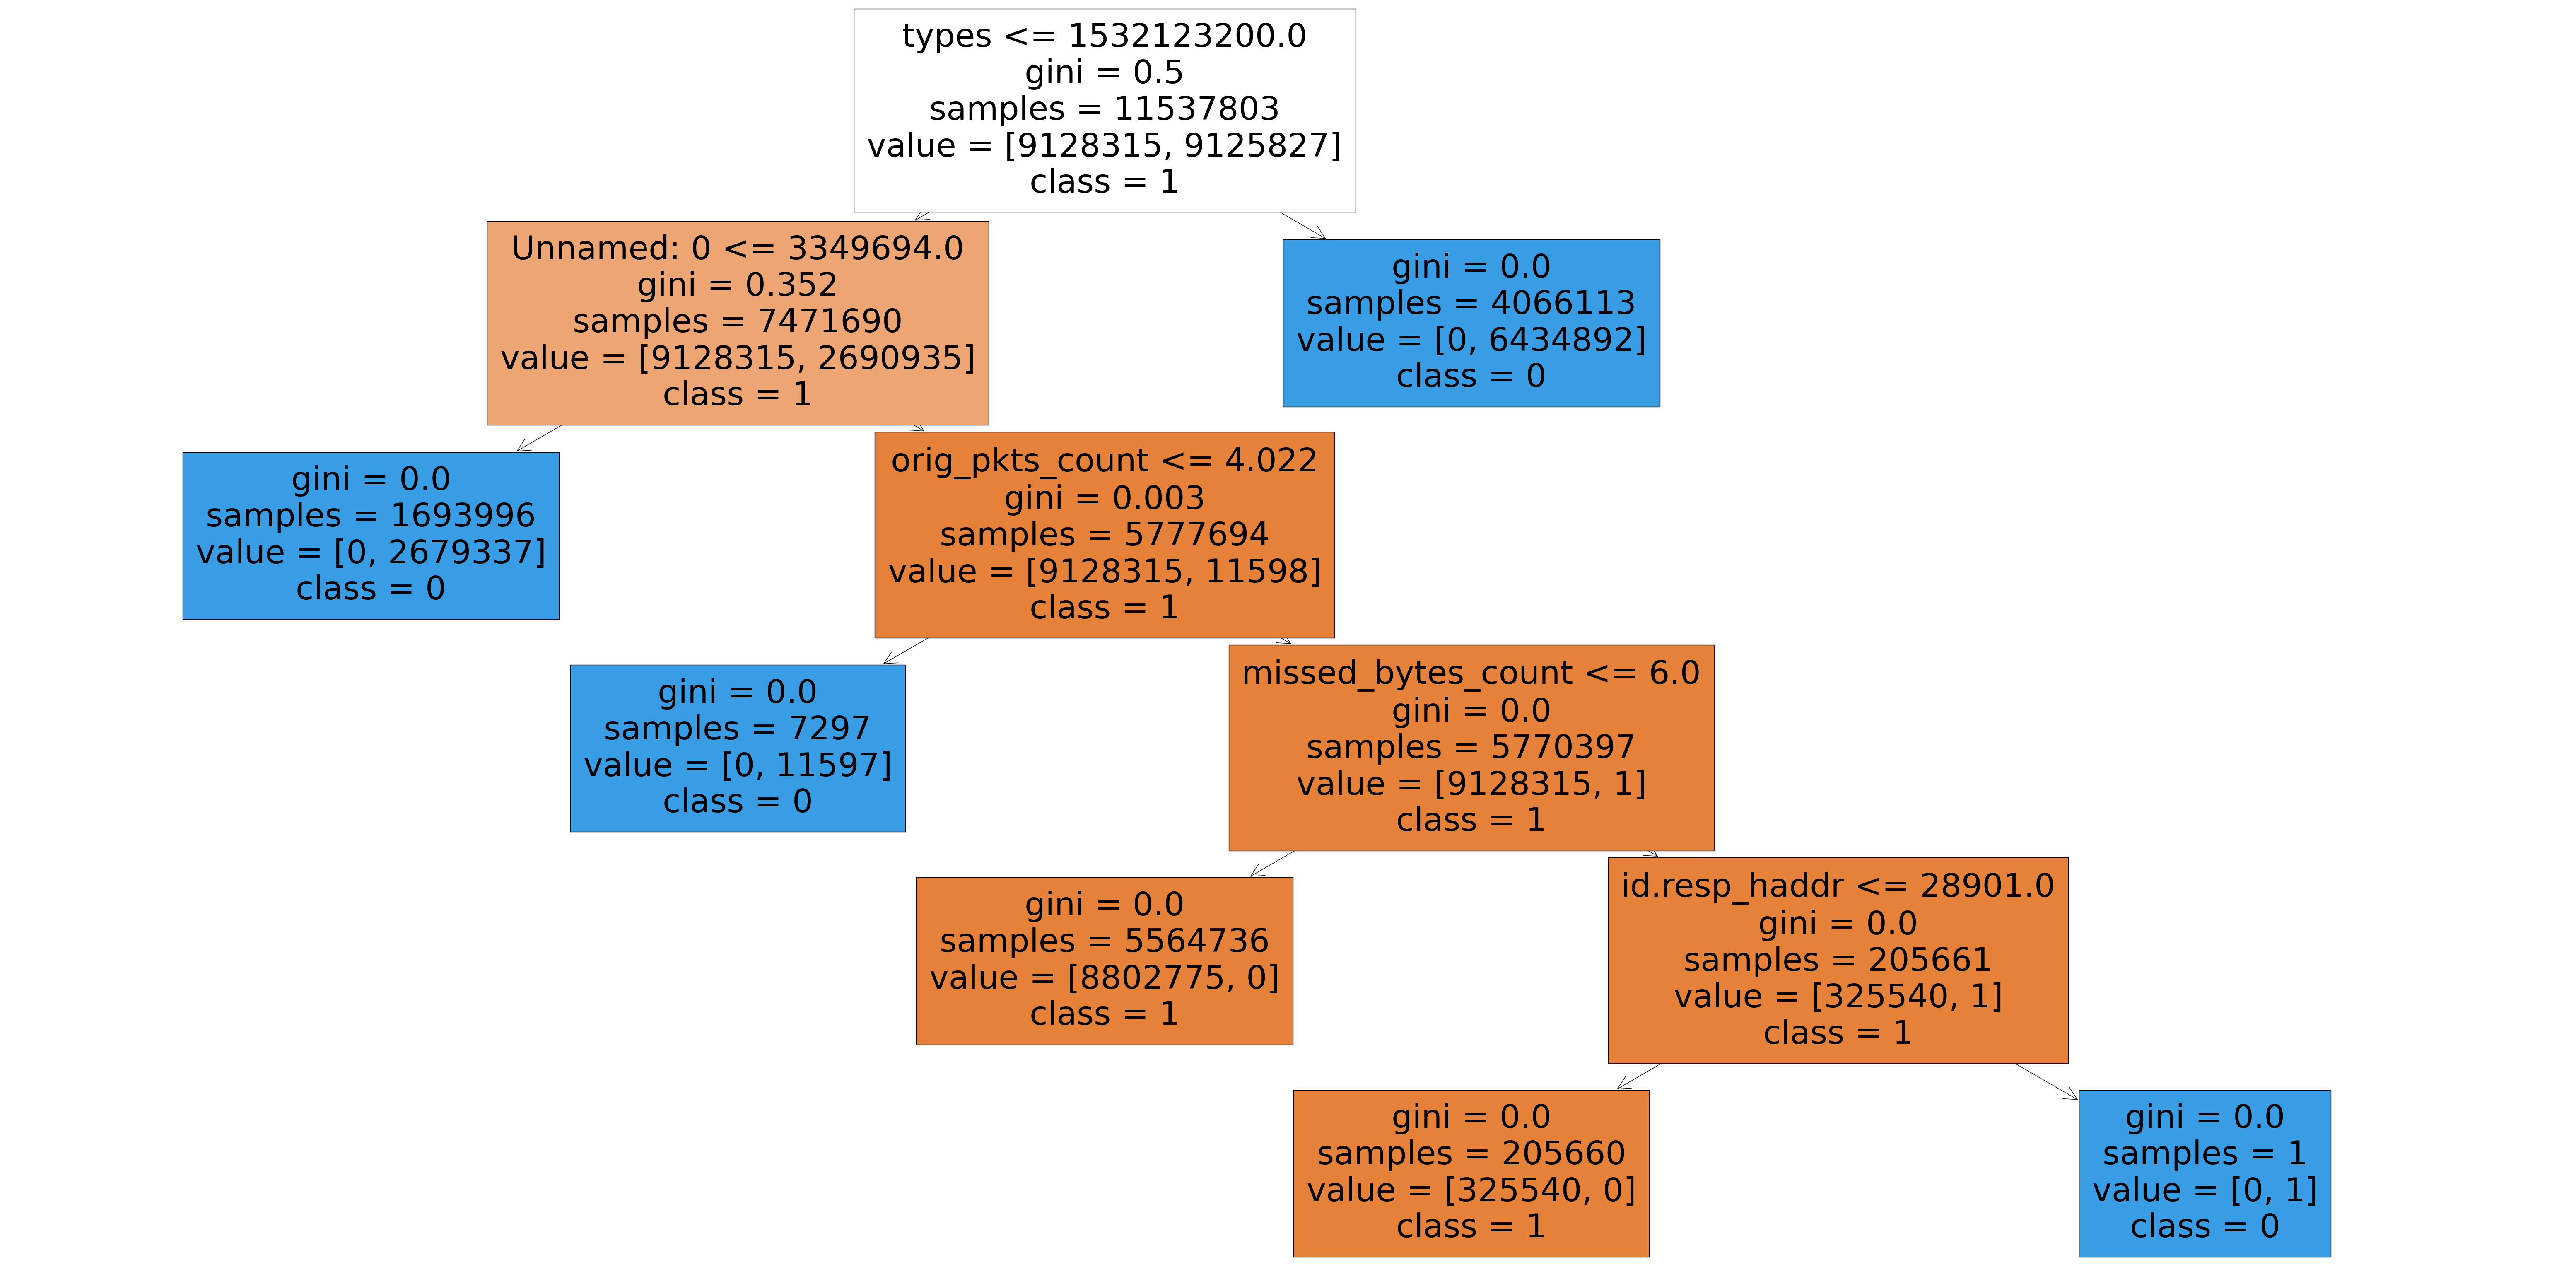

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(80,40))
plot_tree(classifier_rf.estimators_[5], feature_names = X.columns,class_names=['1', "0"],filled=True);

In [ ]:
from sklearn.tree import export_text

# Assuming classifier_rf is a trained Random Forest classifier
tree_text = export_text(classifier_rf.estimators_[5], feature_names=list(X.columns))

# Print the textual representation of the decision tree
print(tree_text)

|--- types <= 1532123200.00
|   |--- Unnamed: 0 <= 3349694.00
|   |   |--- class: 1.0
|   |--- Unnamed: 0 >  3349694.00
|   |   |--- orig_pkts_count <= 4.02
|   |   |   |--- class: 1.0
|   |   |--- orig_pkts_count >  4.02
|   |   |   |--- missed_bytes_count <= 6.00
|   |   |   |   |--- class: 0.0
|   |   |   |--- missed_bytes_count >  6.00
|   |   |   |   |--- id.resp_haddr <= 28901.00
|   |   |   |   |   |--- class: 0.0
|   |   |   |   |--- id.resp_haddr >  28901.00
|   |   |   |   |   |--- class: 1.0
|--- types >  1532123200.00
|   |--- class: 1.0



In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Use the forest's predict method on the test data
y_pred_test = classifier_rf.predict(X_test)
accuracy_score(y_test, y_pred_test)
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   2281768
           1       1.00      1.00      1.00   2281768

    accuracy                           1.00   4563536
   macro avg       1.00      1.00      1.00   4563536
weighted avg       1.00      1.00      1.00   4563536



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred_test = knn.predict(X_test)
accuracy_score(y_test, y_pred_test)
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   2281768
           1       1.00      1.00      1.00   2281768

    accuracy                           1.00   4563536
   macro avg       1.00      1.00      1.00   4563536
weighted avg       1.00      1.00      1.00   4563536



In [ ]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel = 'linear', C = 1E10)
model.fit(X_train, y_train)

SVC(C=10000000000.0, kernel='linear')

In [ ]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Apply SMOTE to the training data only
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Train a RandomForestClassifier on the resampled data
clf = RandomForestClassifier(random_state=42)
clf.fit(X_resampled, y_resampled)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_rep)

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2492
           1       1.00      1.00      1.00      4985

    accuracy                           1.00      7477
   macro avg       1.00      1.00      1.00      7477
weighted avg       1.00      1.00      1.00      7477



In [ ]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report


# Create individual classifiers
classifier_rf = RandomForestClassifier(n_estimators=100, random_state=42)
classifier_dt = DecisionTreeClassifier(random_state=42)
classifier_lr = LogisticRegression(random_state=42)

# Create a voting classifier
voting_classifier = VotingClassifier(estimators=[
    ('rf', classifier_rf),
    ('dt', classifier_dt),
    ('lr', classifier_lr)
], voting='hard')  # 'hard' for majority voting

# Train the voting classifier
voting_classifier.fit(X_train, y_train)

# Use the voting classifier's predict method on the test data
y_pred_test = voting_classifier.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred_test)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred_test))

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   2281768
           1       1.00      1.00      1.00   2281768

    accuracy                           1.00   4563536
   macro avg       1.00      1.00      1.00   4563536
weighted avg       1.00      1.00      1.00   4563536



In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Assuming X_train, X_test, y_train, y_test are already defined

# Create individual classifiers
classifier_rf = RandomForestClassifier(n_estimators=40, random_state=42)
classifier_knn = KNeighborsClassifier()

# Fit individual classifiers
classifier_rf.fit(X_train, y_train)
classifier_knn.fit(X_train, y_train)

# Create a voting classifier
voting_classifier = VotingClassifier(estimators=[
    ('rf', classifier_rf),
    ('knn', classifier_knn)
], voting='hard')

# Train the voting classifier
voting_classifier.fit(X_train, y_train)

# Use the voting classifier's predict method on the test data
y_pred_test = voting_classifier.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred_test)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred_test))

# Define classifiers dictionary
classifiers_voting = {
    'Random Forest': classifier_rf,
    'KNN': classifier_knn,
    'Voting Classifier': voting_classifier
}

# Initialize classification_reports dictionary
classification_reports_voting = {}

# Get classification reports for individual classifiers
for name, classifier in classifiers_voting.items():
    y_pred_test_individual = classifier.predict(X_test)
    report = classification_report(y_test, y_pred_test_individual, output_dict=True)
    classification_reports_voting[name] = report

# Plot bar plot for precision, recall, and f1-score
categories_voting = ['precision', 'recall', 'f1-score']
scores_voting = {category: [classification_reports_voting[name]['weighted avg'][category] for name in classifiers_voting] for category in categories_voting}

fig_voting, ax_voting = plt.subplots(figsize=(10, 6))

bar_width_voting = 0.2
index_voting = np.arange(len(classifiers_voting))

for i, category in enumerate(categories_voting):
    bars = ax_voting.bar(index_voting + i * bar_width_voting, scores_voting[category], bar_width_voting, label=category)
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 3), ha='center', va='bottom')

ax_voting.set_xticks(index_voting + bar_width_voting * (len(categories_voting) - 1) / 2)
ax_voting.set_xticklabels(classifiers_voting.keys())
ax_voting.legend()
ax_voting.set_ylabel('Score')
ax_voting.set_title('Precision, Recall, and F1-Score Comparison')

plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler

# Assuming df is your original DataFrame
# Sample a smaller subset of your data for demonstration purposes
small_df = df.sample(n=25000, random_state=42)

X = small_df.drop(['Category', 'uid_string', 'history_string', 'id.orig_port', 'id.resp_pport', 'resp_bytes_count'], axis=1)
y = small_df['Category']
print('Target class distribution')
print(y.value_counts())

# Assuming 'y' is your target variable
# Convert categorical target variable to numerical using LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Apply RandomOverSampler to the minority class
# You can adjust the sampling_strategy based on your needs
oversample = RandomOverSampler(sampling_strategy=0.5)
# fit and apply the transform
X_over, y_over = oversample.fit_resample(X, y_encoded)
print('Target class distribution after Sampling')
print(pd.DataFrame(y_over).value_counts())

# Separate majority and minority classes
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, stratify=y_over, test_size=0.2, random_state=42)
print('Target class(train) distribution after Sampling')
print(pd.DataFrame(y_train).value_counts())
print('Target class(test) distribution after Sampling')
print(pd.DataFrame(y_test).value_counts())


Target class distribution
Category
Non DDoS          24921
Malicious DDoS       79
Name: count, dtype: int64
Target class distribution after Sampling
1    24921
0    12460
Name: count, dtype: int64
Target class(train) distribution after Sampling
1    19936
0     9968
Name: count, dtype: int64
Target class(test) distribution after Sampling
1    4985
0    2492
Name: count, dtype: int64


SVM
/n
{'0': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 2492.0}, '1': {'precision': 0.6024884351571224, 'recall': 0.7576730190571715, 'f1-score': 0.671228007819442, 'support': 4985.0}, 'accuracy': 0.505149123980206, 'macro avg': {'precision': 0.3012442175785612, 'recall': 0.3788365095285858, 'f1-score': 0.335614003909721, 'support': 7477.0}, 'weighted avg': {'precision': 0.4016858164047419, 'recall': 0.505149123980206, 'f1-score': 0.447515262669509, 'support': 7477.0}}
KNN
/n
{'0': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 2492.0}, '1': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 4985.0}, 'accuracy': 1.0, 'macro avg': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 7477.0}, 'weighted avg': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 7477.0}}
Voting Classifier
/n
{'0': {'precision': 0.6735135135135135, 'recall': 1.0, 'f1-score': 0.8049095607235142, 'support': 2492.0}, '1': {'precision': 1.0, 'recall

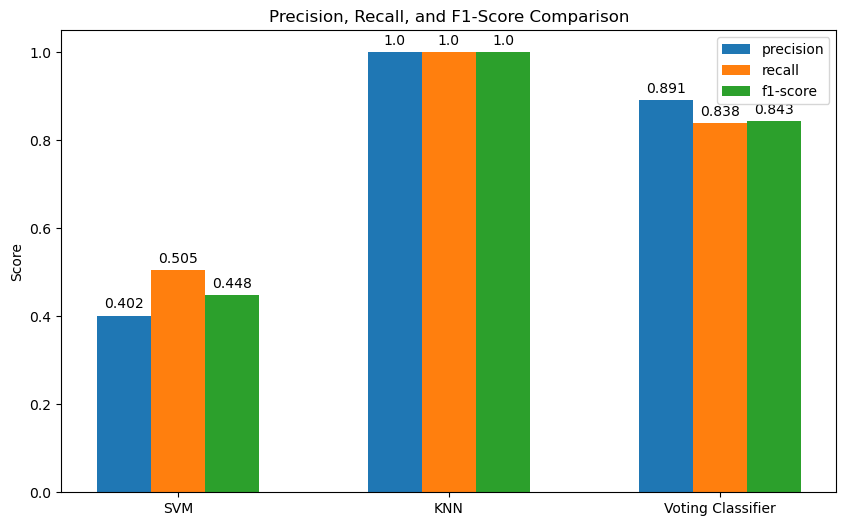

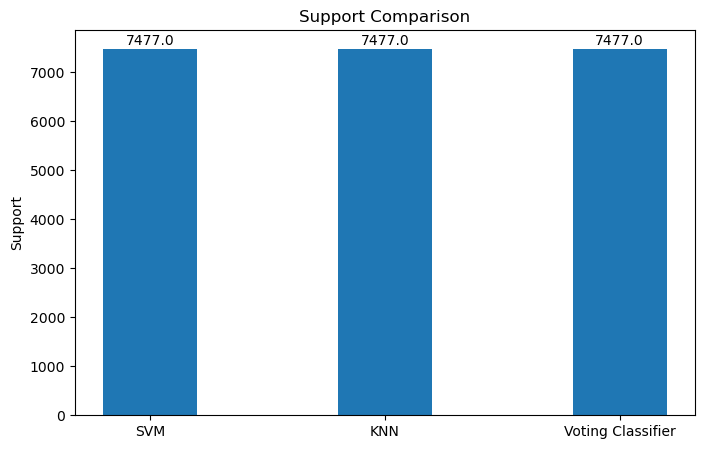

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

# Assuming X_train, X_test, y_train, y_test are already defined

# Apply SMOTE to the training data only
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Train a RandomForestClassifier on the resampled data
clf_rf = RandomForestClassifier(random_state=42)
clf_rf.fit(X_resampled, y_resampled)

# Create individual classifiers
classifier_svm = SVC(kernel='linear', random_state=20)
classifier_knn = KNeighborsClassifier()

# Create a voting classifier
voting_classifier = VotingClassifier(estimators=[
    ('svm', classifier_svm),
    ('knn', classifier_knn)
], voting='hard')

# Fit individual classifiers
classifier_svm.fit(X_train, y_train)
classifier_knn.fit(X_train, y_train)

# Train the voting classifier
voting_classifier.fit(X_train, y_train)

# Use the voting classifier's predict method on the test data
y_pred_test_voting = voting_classifier.predict(X_test)

# Define classifiers dictionary
classifiers = {
    'SVM': classifier_svm,
    'KNN': classifier_knn,
    'Voting Classifier': voting_classifier
}

# Initialize classification_reports dictionary
classification_reports = {}

# Get classification reports for individual classifiers
for name, classifier in classifiers.items():
    y_pred_test_individual = classifier.predict(X_test)
    report = classification_report(y_test, y_pred_test_individual, output_dict=True)
    classification_reports[name] = report
    print(name)
    print(classification_reports[name])

# Plot bar plot for precision, recall, and f1-score
categories = ['precision', 'recall', 'f1-score']
scores = {category: [classification_reports[name]['weighted avg'][category] for name in classifiers] for category in categories}

fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.2
index = np.arange(len(classifiers))

for i, category in enumerate(categories):
    bars = ax.bar(index + i * bar_width, scores[category], bar_width, label=category)
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 3), ha='center', va='bottom')

ax.set_xticks(index + bar_width * (len(categories) - 1) / 2)
ax.set_xticklabels(classifiers.keys())
ax.legend()
ax.set_ylabel('Score')
ax.set_title('Precision, Recall, and F1-Score Comparison')

plt.show()

# Plot bar plot for support
categories_support = ['support']
scores_support = {category: [classification_reports[name]['macro avg'][category] for name in classifiers] for category in categories_support}

fig_support, ax_support = plt.subplots(figsize=(8, 5))

bar_width_support = 0.4
index_support = np.arange(len(classifiers))

bars_support = ax_support.bar(index_support, scores_support['support'], bar_width_support)
for bar in bars_support:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 10, round(yval, 3), ha='center', va='bottom')

ax_support.set_xticks(index_support)
ax_support.set_xticklabels(classifiers.keys())
ax_support.set_ylabel('Support')
ax_support.set_title('Support Comparison')

plt.show()


Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2492
           1       1.00      1.00      1.00      4985

    accuracy                           1.00      7477
   macro avg       1.00      1.00      1.00      7477
weighted avg       1.00      1.00      1.00      7477



C:\Users\016775421\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\016775421\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\016775421\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start,

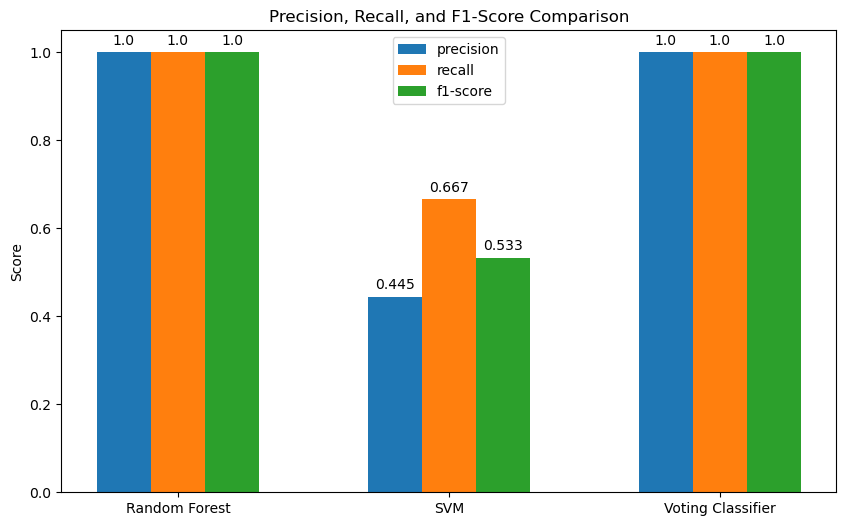

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Assuming X_train, X_test, y_train, y_test are already defined

# Create individual classifiers
classifier_rf = RandomForestClassifier(n_estimators=40, random_state=42)
classifier_svm = SVC(probability=True, random_state=42)

# Fit individual classifiers
classifier_rf.fit(X_train, y_train)
classifier_svm.fit(X_train, y_train)

# Create a voting classifier
voting_classifier = VotingClassifier(estimators=[
    ('rf', classifier_rf),
    ('svm', classifier_svm)
], voting='hard')

# Train the voting classifier
voting_classifier.fit(X_train, y_train)

# Use the voting classifier's predict method on the test data
y_pred_test = voting_classifier.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred_test)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred_test))

# Define classifiers dictionary
classifiers_voting = {
    'Random Forest': classifier_rf,
    'SVM': classifier_svm,
    'Voting Classifier': voting_classifier
}

# Initialize classification_reports dictionary
classification_reports_voting = {}

# Get classification reports for individual classifiers
for name, classifier in classifiers_voting.items():
    y_pred_test_individual = classifier.predict(X_test)
    report = classification_report(y_test, y_pred_test_individual, output_dict=True)
    classification_reports_voting[name] = report

# Plot bar plot for precision, recall, and f1-score
categories_voting = ['precision', 'recall', 'f1-score']
scores_voting = {category: [classification_reports_voting[name]['weighted avg'][category] for name in classifiers_voting] for category in categories_voting}

fig_voting, ax_voting = plt.subplots(figsize=(10, 6))

bar_width_voting = 0.2
index_voting = np.arange(len(classifiers_voting))

for i, category in enumerate(categories_voting):
    bars = ax_voting.bar(index_voting + i * bar_width_voting, scores_voting[category], bar_width_voting, label=category)
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 3), ha='center', va='bottom')

ax_voting.set_xticks(index_voting + bar_width_voting * (len(categories_voting) - 1) / 2)
ax_voting.set_xticklabels(classifiers_voting.keys())
ax_voting.legend()
ax_voting.set_ylabel('Score')
ax_voting.set_title('Precision, Recall, and F1-Score Comparison')

plt.show()

Saving the model

In [ ]:
import pickle

# Assuming your trained model is named 'voting_classifier'
model_filename = 'Desktop/voting_classifier_model.pkl'

# Save the model to a file using Pickle
with open(model_filename, 'wb') as file:
    pickle.dump(voting_classifier, file)

Loaded model

In [ ]:
loaded_model

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(n_estimators=40,
                                                     random_state=42)),
                             ('svm', SVC(probability=True, random_state=42))])